<a href="https://colab.research.google.com/github/abderrahimJK/regression-model_multiple_polynomiale/blob/main/TP2_R%C3%A9gression_multiple_et_polynomiale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
path_var = 'drive/MyDrive/ML-Buoihi/'

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score


In [6]:
df = pd.read_csv(path_var+"udemy_courses.csv")

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


##Data Cleansing

In [8]:
# Drop the id and date columns
df = df.drop(['course_id', 'url','is_paid','level','subject','course_title','published_timestamp' ], axis=1)

In [9]:
df.head()

,price,num_subscribers,num_reviews,num_lectures,content_duration
0,200,2147,23,51,1.5
1,75,2792,923,274,39.0
2,45,2174,74,51,2.5
3,95,2451,11,36,3.0
4,200,1276,45,26,2.0


In [10]:
#Check for missing data

df.isnull().sum()

price               0
num_subscribers     0
num_reviews         0
num_lectures        0
content_duration    0
dtype: int64

In [11]:
# Filter relevant features
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values


In [12]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:

# Multiple Regression
multiple_regression = LinearRegression()
multiple_regression.fit(X_train, y_train)
y_pred_multiple = multiple_regression.predict(X_test)

In [14]:

# Polynomial Regression
polynomial_features = PolynomialFeatures(degree=2)
X_train_poly = polynomial_features.fit_transform(X_train)
X_test_poly = polynomial_features.transform(X_test)

In [15]:
polynomial_regression = LinearRegression()
polynomial_regression.fit(X_train_poly, y_train)
y_pred_poly = polynomial_regression.predict(X_test_poly)

# Evaluate the models
print("Multiple Regression R2 score:", r2_score(y_test, y_pred_multiple))
print("Polynomial Regression R2 score:", r2_score(y_test, y_pred_poly))

Multiple Regression R2 score: 0.10635201635522773
Polynomial Regression R2 score: 0.12951279045705455


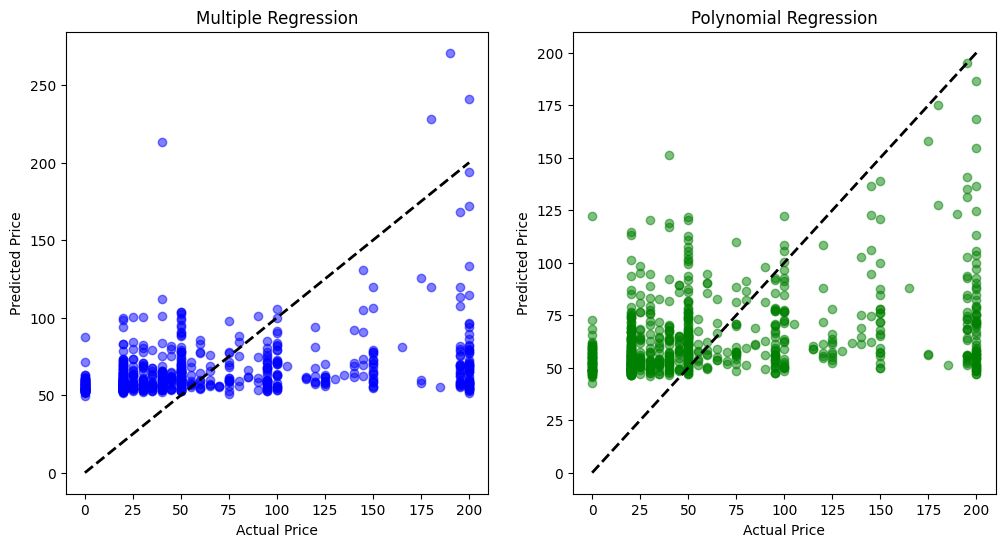

In [16]:
import matplotlib.pyplot as plt

# Plot the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Multiple Regression plot
ax1.scatter(y_test, y_pred_multiple, color='blue', alpha=0.5)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax1.set_xlabel('Actual Price')
ax1.set_ylabel('Predicted Price')
ax1.set_title('Multiple Regression')

# Polynomial Regression plot
ax2.scatter(y_test, y_pred_poly, color='green', alpha=0.5)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax2.set_xlabel('Actual Price')
ax2.set_ylabel('Predicted Price')
ax2.set_title('Polynomial Regression')

plt.show()